In [83]:
import numpy as np
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [84]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [85]:
target = wine['class']

target_df = pd.DataFrame(target)
train = wine[['alcohol', 'sugar', 'pH']]

#target_df.isnull().sum(axis=0)
train.isnull().sum(axis=0)

alcohol    0
sugar      0
pH         0
dtype: int64

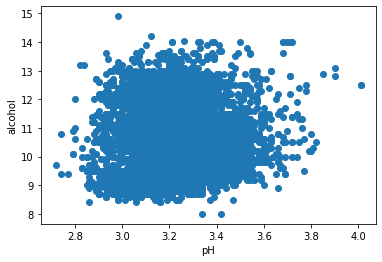

,pH,alcohol
pH,1.000000,0.121248
alcohol,0.121248,1.000000


In [86]:
import matplotlib.pyplot as plt

plt.scatter(train['pH'], train['alcohol'])

plt.xlabel('pH')
plt.ylabel('alcohol')

plt.show()

train[['pH', 'alcohol']].corr()

In [87]:
target = wine['class'].to_numpy()
train = wine[['alcohol', 'sugar', 'pH']].to_numpy()

print(type(train), type(target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [88]:
from sklearn.model_selection import train_test_split

train_input, train_test, train_target, target_tset = train_test_split(train, target, train_size=0.8, random_state=42)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, train_target, train_size=0.8, random_state=42)

print(val_scaled.shape, val_target.shape)

(1040, 3) (1040,)


In [89]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(3,)))
model.add(Dense(2, activation='relu'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               400       
                                                                 
 dense_27 (Dense)            (None, 2)                 202       
                                                                 
Total params: 602
Trainable params: 602
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(loss='binary_crossentropy', metrics='accuracy', optimizer='sgd')
loss_function = 'binary_crossentropy'
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
model.evaluate(train_test, target_tset)

41/41 [==============================] - 0s 950us/step - loss: 7.6894 - accuracy: 0.7377


[7.689429759979248, 0.7376922965049744]

In [91]:
print(history.history.keys())
print(history.history['loss'], history.history['accuracy'])

dict_keys(['loss', 'accuracy'])
[7.455493450164795, 7.691586494445801, 7.691586494445801, 7.691586494445801, 7.691586017608643, 7.691586494445801, 7.691585540771484, 7.691586017608643, 7.691586494445801, 7.691586494445801, 7.691586017608643, 7.691586494445801, 7.691586494445801, 7.691586971282959, 7.691586494445801, 7.691586494445801, 7.691586017608643, 7.691586017608643, 7.691586494445801, 7.691586494445801] [0.7594419121742249, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418, 0.7623286247253418]


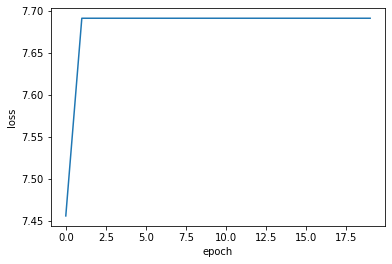

In [92]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

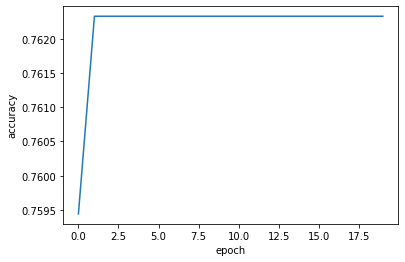

In [93]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [94]:
def model_fn(a_layer=None):
    model = Sequential()

    #model2 =Sequential()
    model.add(keras.layers.Flatten(input_shape = (3,)))
    model.add(keras.layers.Dense(100, activation='sigmoid'))
    if a_layer :
        model.add(a_layer)
    model.add(keras.layers.Dense(2, activation='relu'))
    return model

In [95]:
model = model_fn()
model.compile(loss=loss_function, metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


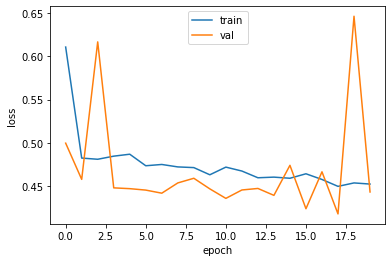

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train', 'val'])

plt.show()

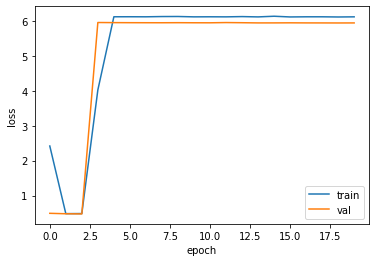

In [97]:
model = model_fn()

model.compile(optimizer='adam', loss=loss_function, metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train', 'val'])

plt.show()

In [98]:
from keras.layers import Dropout

model = model_fn(Dropout(0.3))

In [99]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 3)                 0         
                                                                 
 dense_32 (Dense)            (None, 100)               400       
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_33 (Dense)            (None, 2)                 202       
                                                                 
Total params: 602
Trainable params: 602
Non-trainable params: 0
_________________________________________________________________


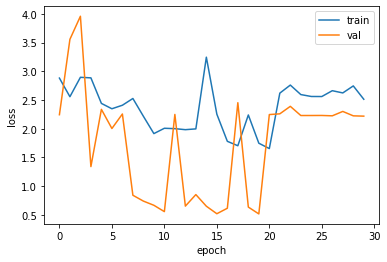

In [100]:
model.compile(optimizer='adam', loss=loss_function, metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=30, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train', 'val'])

plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


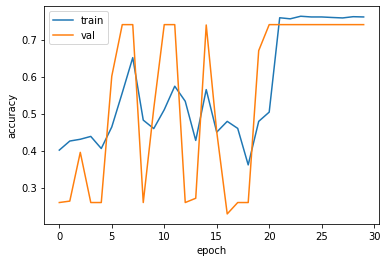

In [101]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['train', 'val'])

plt.show()

In [102]:
model.save_weights('model_weights.h5')

In [103]:
!ls -al *.h5

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [106]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

model_df = pd.DataFrame(model.predict(val_scaled))
model_df

0.7403846153846154


,0,1
0,0.540380,2.159428
1,0.495222,2.098960
2,0.562438,2.157053
3,0.495461,2.143398
4,0.374554,2.005013
...,...,...
1035,0.547264,2.164953
1036,0.472662,2.116034
1037,1.467786,2.827898
1038,0.494603,2.133364
